# Weighted ECM clustering vs Traditional ECM clustering
### With IRIS (UCI dataset)

In [5]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
from evclust.ecm import ecm
from evclust.wecm_outlier import wecm
from evclust.utils import ev_summary, ev_plot, ev_pcaplot, plotting, calculate_non_specificity
import pandas as pd
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt


   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


D:\vtdo\projects\evclust\src\evclust\utils.py:1089: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(data_reduced[i, 0], data_reduced[i, 1], alpha=0.5, c=colors[i], marker=marker_list[i])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


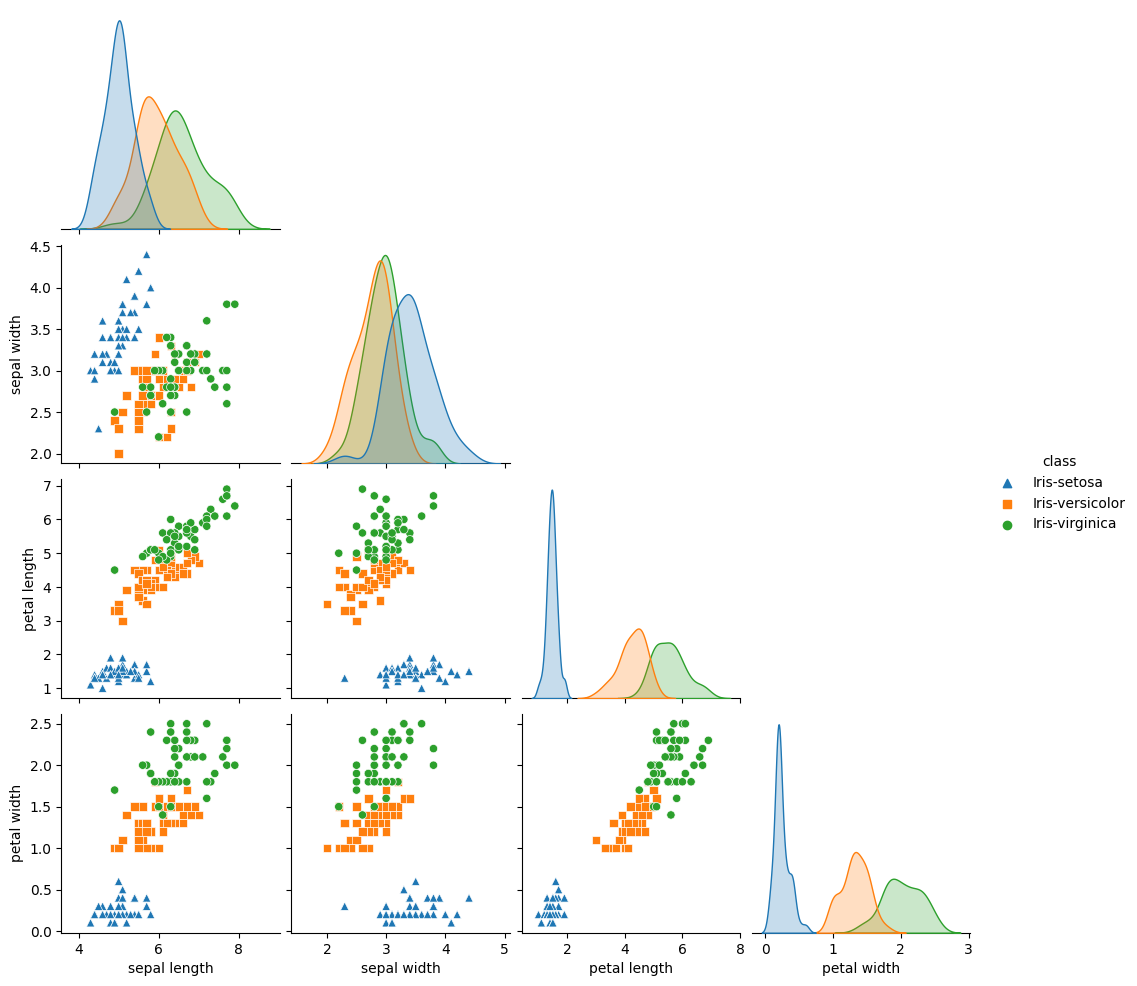

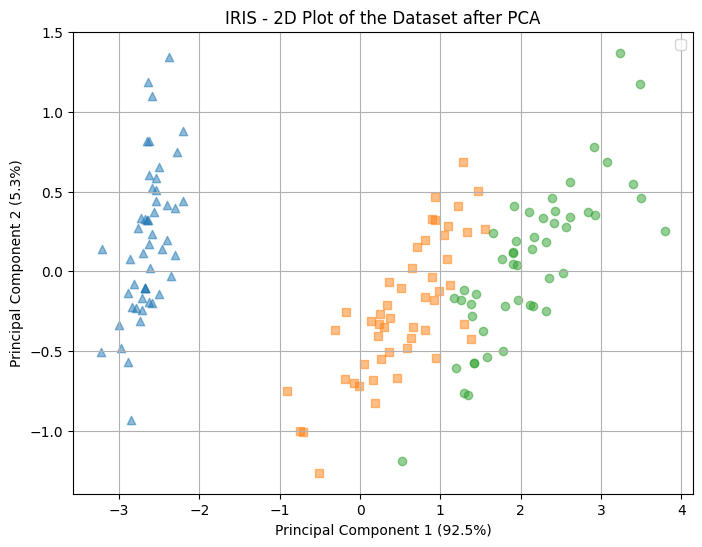

In [6]:
# fetch dataset - IRIS
iris = fetch_ucirepo(id=53)

# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])

markers = ['^', 's', 'o']
plotting(X, y, ds_name="IRIS", matrix_plot=True, markers=markers)

# Normalization
# scaler = MinMaxScaler((0,1))
# X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [7]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
model_list = np.array([])
for i in range(10):
    model = ecm(x=X, c=3, beta=2, alpha=1, delta=delta, ntrials=1, init="kmeans")
    model_list = np.append(model_list, model)

model_list = sorted(model_list, key=lambda x : x['crit'])
# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

[1, 38.45075863852914]
[2, 38.16446618560937]
[3, 38.11848040057066]
[4, 38.0871501368507]
[5, 38.05502769200555]
[6, 38.01903171050761]
[7, 37.97812228117465]
[8, 37.93233181088386]
[9, 37.88268909340852]
[10, 37.831167136687]
[11, 37.78039789799768]
[12, 37.733117492530795]
[13, 37.691528938589]
[14, 37.656868489311236]
[15, 37.6293399083329]
[16, 37.60835624850389]
[17, 37.59289942901781]
[18, 37.58183338121353]
[19, 37.57410227544751]
[20, 37.568820929188426]
[21, 37.565293747652625]
[22, 37.56299710561478]
[23, 37.561548393437796]
[24, 37.560674040610415]
[1, 38.52795535008786]
[2, 38.18904837797538]
[3, 38.141888954753895]
[4, 38.11301569097646]
[5, 38.08460532536731]
[6, 38.0530875917112]
[7, 38.016969723665035]
[8, 37.97567511198249]
[9, 37.92945209521683]
[10, 37.879462545474105]
[11, 37.82776849722159]
[12, 37.777045345983055]
[13, 37.730019193937025]
[14, 37.68883639568166]
[15, 37.65465420900397]
[16, 37.62760334924734]
[17, 37.60704727293232]
[18, 37.59194460045081]
[19, 3

J values: [37.56062613687252, 37.56062613687252, 37.56062613687252, 37.560644845152886, 37.560644845152886, 37.56067404061041, 37.56067404061041, 37.560674040610415, 37.56067404061042, 37.56067404061042]
ARI values: [0.6186778263658562, 0.6186778263658562, 0.6186778263658562, 0.6186778263658562, 0.6186778263658562, 0.6186778263658562, 0.6186778263658562, 0.6186778263658562, 0.6186778263658562, 0.6186778263658562]
NS values: [1.4099954578901222, 1.4045564355337397, 1.4214184110564254, 1.489562682284907, 1.4213672835382705, 1.4755440182325832, 1.4755440182325832, 1.421279271088719, 1.4894342511752832, 1.4894342511752832]
NMI values: [0.6748634492283149, 0.6748634492283149, 0.6748634492283149, 0.6748634492283149, 0.6748634492283149, 0.6748634492283149, 0.6748634492283149, 0.6748634492283149, 0.6748634492283149, 0.6748634492283149]
Average ARI values: 0.6186778263658563
Average Non-specificity: 1.4498136080207915
Average Normalized mutual infor: 0.674863449228315
Center: [[6.01749908 2.768

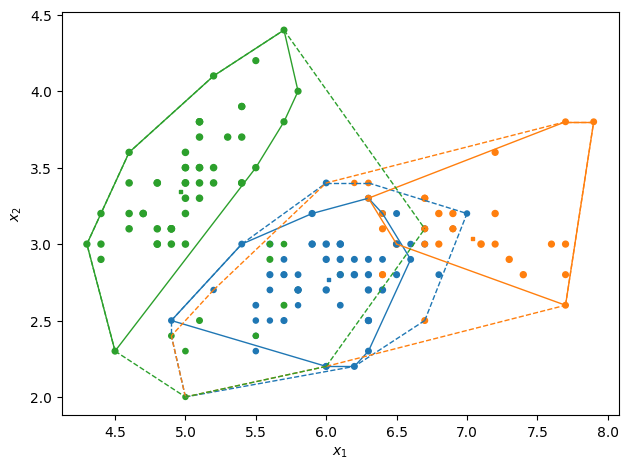

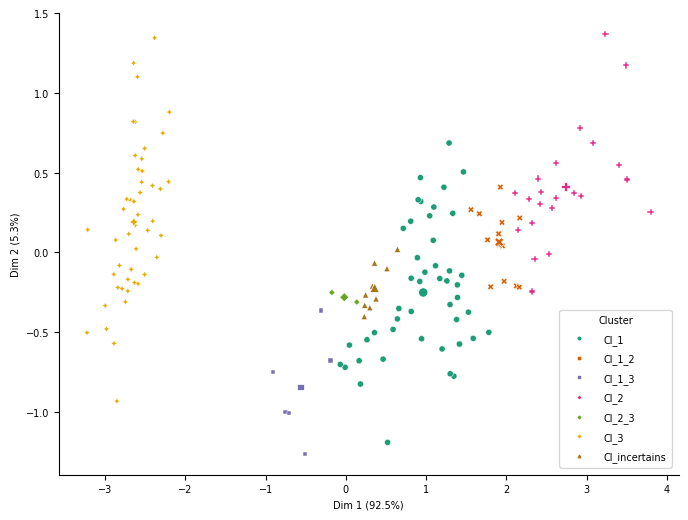

In [8]:

print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")
print(f"Center: {model_list[0]['g']}")
# Plotting the the model with the minimum J value
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)


## Weighted ECM (WECM)

In [9]:
%%capture
# Weighted ECM clustering
model_list = np.array([])
c = 3
d = X.shape[1]
for i in range(10):
    W = np.ones((c, d)) * (1/d)
    # W = None
    g0 = None
    delta = np.sqrt(20)
    model = wecm(x=X, c=c, g0=g0, W=W, beta=2, alpha=1, delta=delta, epsi=1e-3, ntrials=1, init="kmeans", stopping_factor="center")
    model_list = np.append(model_list, model)

model_list = sorted(model_list, key=lambda model: model['crit'])

# ARIs
true_labels = numeric_labels
predicted_labels_list = list(map(lambda model: np.argmax(model['betp'], axis=1), model_list))
ari_list = [adjusted_rand_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

# Non-specificity values of top 10
top_NS = [calculate_non_specificity(model, verbose=False) for model in model_list]

# Normalize mutual infor scores
NMIs = [normalized_mutual_info_score(true_labels, predicted_labels) for predicted_labels in predicted_labels_list]

Intitial noise weights: [0.26966014 0.29261915 0.23270438 0.20501632]
Initial weights: 
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
---------Iteration #1---------
Initial prototypes: 
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[1, 1.7785348421841385]
[2, 1.4710558024800224]
[3, 1.3533800556871554]
[4, 1.2740016618491399]
[5, 1.2152735906496197]
[6, 1.1759986537168565]
[7, 1.1523564058349103]
[8, 1.1373403906278794]
[9, 1.1287824777918944]
[10, 1.1195495086038167]
[11, 1.1118215750248879]
[12, 1.1082642522812796]
[13, 1.1056409067288693]
[14, 1.10344826749148]
[15, 1.102271324562975]
[16, 1.1020157529788657]
---------End Iteration #1---------
Intitial noise weights: [0.26966014 0.29261915 0.23270438 0.20501632]
Initial weights: 
 [[0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25]]
---------Iteration #1---------
Initial prototypes: 
 [[6.85     

In [14]:

print(f"J values: {[x['crit'] for x in model_list]}")
print(f"ARI values: {ari_list}")
print(f"NS values: {top_NS}")
print(f"NMI values: {NMIs}")
print(f"Average ARI values: {np.mean(ari_list)}")
print(f"Average Non-specificity: {np.mean(top_NS)}")
print(f"Average Normalized mutual infor: {np.mean(NMIs)}")


J values: [1.100986268456786, 1.1020157529788654, 1.1020157529788657, 1.102015752978866, 1.102015752978866, 1.1020157529788661, 1.1020157529788661, 1.1020157529788663, 1.1034657235396008, 1.1034657235396015]
ARI values: [0.4252066898583907, 0.4252066898583907, 0.4252066898583907, 0.4252066898583907, 0.4252066898583907, 0.4252066898583907, 0.4252066898583907, 0.4252066898583907, 0.43097892932755316, 0.43097892932755316]
NS values: [1.64397994242328, 1.6724619351995247, 1.7347121976949373, 1.6214477812371995, 1.6214477812371995, 1.5694428986069775, 1.5694428986069775, 1.6112093836122279, 1.620425411381059, 1.6403638814836987]
NMI values: [0.4715459574116274, 0.4715459574116274, 0.4715459574116274, 0.4715459574116274, 0.4715459574116274, 0.4715459574116274, 0.4715459574116274, 0.4715459574116274, 0.47659179697750637, 0.47659179697750637]
Average ARI values: 0.42636113775222323
Average Non-specificity: 1.6304934111483083
Average Normalized mutual infor: 0.47255512532480315


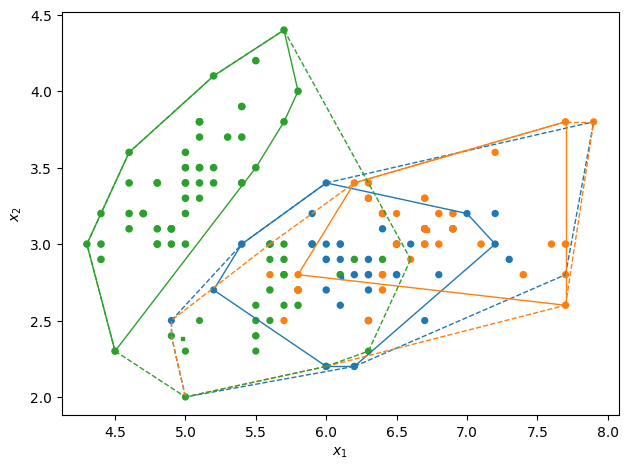

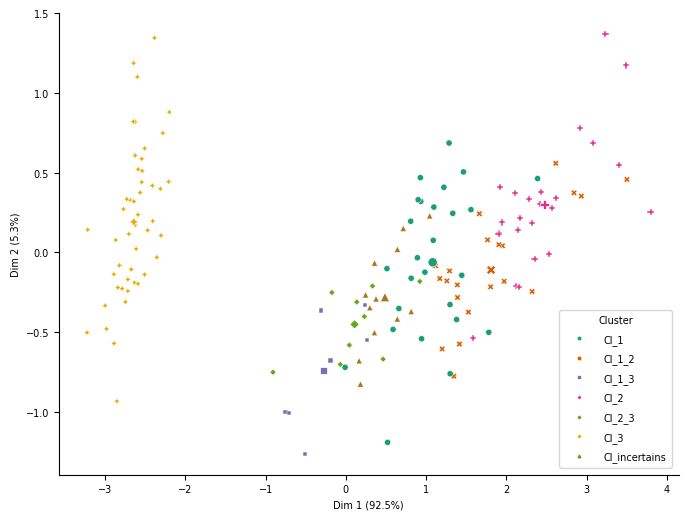

In [11]:
# Plotting PCA of the best model
ev_plot(model_list[0], X=X, cex=20)
ev_pcaplot(data=X, x=model_list[0], normalize=False, cex=20)

In [12]:
top_weights = [model['W'] for model in model_list]
for W in top_weights:
    print(f"\n{W}")


[[0.02404085 0.09812733 0.02473454 0.85309728]
 [0.04152668 0.19426006 0.02222788 0.74198538]
 [0.05586942 0.00624126 0.15806761 0.77982172]]

[[0.04158887 0.19398967 0.02238015 0.74204131]
 [0.05581379 0.0062548  0.1573219  0.78060951]
 [0.02502543 0.10360147 0.02596186 0.84541123]]

[[0.02502543 0.10360147 0.02596186 0.84541123]
 [0.05581379 0.0062548  0.1573219  0.78060951]
 [0.04158887 0.19398967 0.02238015 0.74204131]]

[[0.04158887 0.19398967 0.02238015 0.74204131]
 [0.02502543 0.10360147 0.02596186 0.84541123]
 [0.05581379 0.0062548  0.1573219  0.78060951]]

[[0.04158887 0.19398967 0.02238015 0.74204131]
 [0.02502543 0.10360147 0.02596186 0.84541123]
 [0.05581379 0.0062548  0.1573219  0.78060951]]

[[0.05581379 0.0062548  0.1573219  0.78060951]
 [0.04158887 0.19398967 0.02238015 0.74204131]
 [0.02502543 0.10360147 0.02596186 0.84541123]]

[[0.05581379 0.0062548  0.1573219  0.78060951]
 [0.04158887 0.19398967 0.02238015 0.74204131]
 [0.02502543 0.10360147 0.02596186 0.84541123]]